# **Atmosphere Sanity Check**

## *Imports*

Need to import wrf-python, cartopy, and netcdf in order to properly plot pressure, winds.

In [1]:
import wrf
from netCDF4 import Dataset #type: ignore
import numpy as np
import cartopy.crs as crs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature
from matplotlib.cm import get_cmap

In [3]:
year = 2023
month = 7
day = 21
hour = 18
domain = 1
plt_type = 'sfc'

wrffile = Dataset(f'2023/wrfout/wrfout_d{domain:02}_{year}-{month:02}-{day:02}_{hour:02}:00:00')

z = wrf.getvar(wrffile, 'z', units='m')
p = wrf.getvar(wrffile, 'pressure')
ua = wrf.getvar(wrffile, 'ua', units='kt')
va = wrf.getvar(wrffile, 'va', units='kt')



In [4]:
if plt_type == 'sfc':
    t2 = wrf.getvar(wrffile, 'T2') - 273.15 # K -> deg C
    u_10 = wrf.interplevel(ua, z, 10)
    v_10 = wrf.interplevel(va, z, 10)
    p_10 = wrf.interplevel(p, z, 10)

In [5]:
lats, lons = wrf.latlon_coords(p_10)
cart_proj = wrf.get_cartopy(p_10)

In [5]:
import cartopy
cartopy.config['data_dir']

PosixPath('/home1/07655/tg869546/.local/share/cartopy')

In [20]:
print(np.max(wrf.to_np(t2)))
print(np.min(wrf.to_np(t2)))
print(wrf.to_np(lats).shape)

44.13452
1.486908
(265, 442)


/home1/07655/tg869546/miniconda3/envs/wrf/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1601: UserWarning: The following kwargs were not used by contour: 'inline'
  result = super().contour(*args, **kwargs)


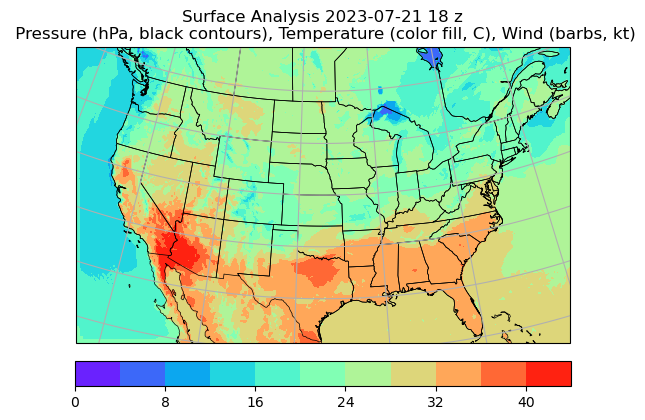

In [19]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': cart_proj})

states = NaturalEarthFeature(category='cultural',scale='50m',facecolor='none',name='admin_1_states_provinces')
lakes = NaturalEarthFeature(category='physical', scale='50m', facecolor='none', name='lakes')
ax.add_feature(states, linewidth=0.5, edgecolor='black')
ax.coastlines('50m', linewidth=0.5)


levels = np.arange(1004., 1024., 4.)
contours = ax.contour(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(p_10), levels=levels, colors='black', transform=crs.PlateCarree())

t_levels = np.arange(0., 48., 4.)
t_contours = ax.contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(t2), levels=t_levels, cmap=plt.get_cmap('rainbow'), transform=crs.PlateCarree())
plt.colorbar(t_contours, ax=ax, orientation='horizontal', pad=0.05)

ax.barbs(wrf.to_np(lons[::125, ::125]), wrf.to_np(lats[::125, ::125]), wrf.to_np(u_10[::125, ::125]), wrf.to_np(v_10[::125, ::125]), length=6, transform=crs.PlateCarree())

ax.set_xlim(wrf.cartopy_xlim(p_10))
ax.set_ylim(wrf.cartopy_ylim(p_10))

ax.gridlines()

plt.title(f'{"Surface" if plt_type=="sfc" else plt_type} Analysis {year}-{month:02}-{day:02} {hour:02} z\n Pressure (hPa, black contours), Temperature (color fill, C), Wind (barbs, kt)')
plt.savefig(f'{plt_type}-{year}-{month:02}-{day:02}_{hour:02}z.png')
plt.show()